In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [2]:
csv_path = "../milestone2/milestone2_dataset.csv"

df = pd.read_csv(csv_path)

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['charges_per_month'] = df['TotalCharges'] / (df['tenure'] + 1)
df['is_long_term'] = (df['tenure'] > 12).astype(int)

In [4]:
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4020\196801821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7021 non-null   object 
 1   SeniorCitizen      7021 non-null   int64  
 2   Partner            7021 non-null   object 
 3   Dependents         7021 non-null   object 
 4   tenure             7021 non-null   int64  
 5   PhoneService       7021 non-null   object 
 6   MultipleLines      7021 non-null   object 
 7   InternetService    7021 non-null   object 
 8   OnlineSecurity     7021 non-null   object 
 9   OnlineBackup       7021 non-null   object 
 10  DeviceProtection   7021 non-null   object 
 11  TechSupport        7021 non-null   object 
 12  StreamingTV        7021 non-null   object 
 13  StreamingMovies    7021 non-null   object 
 14  Contract           7021 non-null   object 
 15  PaperlessBilling   7021 non-null   object 
 16  PaymentMethod      7021 

In [6]:
objects_columns = df.select_dtypes(include = "object").columns

In [7]:
objects_columns.tolist()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [8]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [9]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7021 non-null   int64  
 1   SeniorCitizen      7021 non-null   int64  
 2   Partner            7021 non-null   int64  
 3   Dependents         7021 non-null   int64  
 4   tenure             7021 non-null   int64  
 5   PhoneService       7021 non-null   int64  
 6   MultipleLines      7021 non-null   int64  
 7   InternetService    7021 non-null   int64  
 8   OnlineSecurity     7021 non-null   int64  
 9   OnlineBackup       7021 non-null   int64  
 10  DeviceProtection   7021 non-null   int64  
 11  TechSupport        7021 non-null   int64  
 12  StreamingTV        7021 non-null   int64  
 13  StreamingMovies    7021 non-null   int64  
 14  Contract           7021 non-null   int64  
 15  PaperlessBilling   7021 non-null   int64  
 16  PaymentMethod      7021 

In [11]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'charges_per_month']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
df['Churn'].value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression


In [16]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
y_train.value_counts()

Churn
0    4111
1    1505
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, recall_score, roc_auc_score


    



In [20]:
smote = SMOTE(random_state = 42)



In [21]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [22]:
y_train_smote.value_counts()

Churn
1    4111
0    4111
Name: count, dtype: int64

In [23]:
# models = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "LogisticRegression": LogisticRegression(random_state=42)
# }
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=500)
}

In [24]:
# hyperparameters = {
#     "Random Forest": {
#         "n_estimators": [100, 200],
#         "max_depth": [5, 10, None],
#         "min_samples_split": [2, 5],
#         "min_samples_leaf": [1, 2],
#         "max_features": ["sqrt", "log2"]
#     },
#     # "XGBoost": {
#     #     "learning_rate": [0.05, 0.1, 0.2],
#     #     "max_depth": [3, 5, 7],
#     #     "n_estimators": [100, 200],
#     #     "subsample": [0.8, 1.0],
#     #     "colsample_bytree": [0.8, 1.0]
#     # },
#     "LogisticRegression": {
#         "C": [0.01, 0.1, 1, 10],
#         "penalty": ["l1", "l2", "elasticnet", "none"],
#         "solver": ["lbfgs", "saga"]
#     }
# }

# # hyperparameters = {
# #     "Random Forest" :{
# #         "n_estimators": [50,100, 200],
# #         "max_depth": [5, 10, None],
# #     },
# #     "XGBoost":{
# #         "learning_rate": [0.01, 0.1, 0.2],
# #         "max_depth": [3, 5, 7],
# #     }
# # }
# #

# hyperparameters = {
#     "Random Forest": {
#         "n_estimators": [100, 200],
#         "max_depth": [5, 10, None],
#         "min_samples_split": [2, 5],
#         "min_samples_leaf": [1, 2],
#         "max_features": ["sqrt", "log2"]
#     },

#     "LogisticRegression": [
#         # Valid for l1 penalty
#         {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'], 'solver': ['saga']},
        
#         # Valid for l2 penalty (multiple solvers possible)
#         {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'saga']},
        
#         # Valid for elasticnet penalty (requires l1_ratio)
#         {'C': [0.01, 0.1, 1, 10], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9]},  # You can tune l1_ratio too
        
#         # Valid for none penalty
#         {'C': [0.01, 0.1, 1, 10], 'penalty': ['none'], 'solver': ['lbfgs', 'saga']}
#     ]
# }
hyperparameters = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "max_features": ["sqrt", "log2"]
    },

    "LogisticRegression": [
        {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'], 'solver': ['saga']},
        {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'saga']},
        {'C': [0.01, 0.1, 1, 10], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9]},
        {'C': [0.01, 0.1, 1, 10], 'penalty': ['none'], 'solver': ['lbfgs', 'saga']}
    ]
}


In [ ]:
# best_models = {}
# for model_name , model in models.items():
#     print(f"Tunning {model_name}......")
#     grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
#     grid.fit(X_train_smote, y_train_smote)
#     best_models[model_name] =grid.best_estimator_
#     print(f"Best parameters for {model_name} : {grid.best_params_}")
#     print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")
# Stratified CV for imbalanced data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    grid = GridSearchCV(
        estimator=model,
        param_grid=hyperparameters[model_name],
        cv=cv,
        scoring="f1", 
        n_jobs=-1
    )

    grid.fit(X_train_smote, y_train_smote)

    best_models[model_name] = grid.best_estimator_

    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best F1 score for {model_name}: {grid.best_score_:.4f}\n")

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score for Random Forest: 0.8465

Tuning LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
Best F1 score for LogisticRegression: 0.7984



c:\Users\Administrator\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Administrator\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\miniconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\Administrator\miniconda3\Lib\site-packages\sklearn\base.py

In [26]:
best_models

{'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
 'LogisticRegression': LogisticRegression(C=0.1, l1_ratio=0.1, max_iter=500, penalty='elasticnet',
                    random_state=42, solver='saga')}

In [27]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)

In [28]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['LogisticRegression'], f)

In [29]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
y_test_pred = best_models['LogisticRegression'].predict(X_test)
y_test_prob = best_models['LogisticRegression'].predict_proba(X_test)[:, 1]

In [ ]:
y_test_pred


array([1, 0, 0, ..., 0, 0, 0], shape=(1405,))

In [ ]:
y_test_prob


array([0.59305573, 0.21722658, 0.10760387, ..., 0.07368269, 0.27604007,
       0.06980093], shape=(1405,))

In [47]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))

print(f"Classification Report : \n", classification_report(y_test, y_test_pred))

Accuracy :  0.7416370106761566
ROC - AUC Score :  0.760496255287922
Confusion Matrix : 
 [[761 292]
 [ 71 281]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1053
           1       0.49      0.80      0.61       352

    accuracy                           0.74      1405
   macro avg       0.70      0.76      0.71      1405
weighted avg       0.81      0.74      0.76      1405



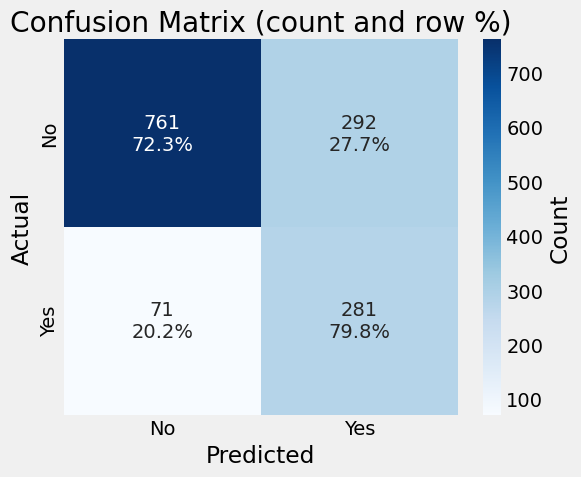

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
labels = ['No', 'Yes']

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percent = cm_norm * 100
annot = np.empty_like(cm).astype(object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{cm_percent[i, j]:.1f}%"

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (count and row %)')
plt.tight_layout()
plt.show()

In [54]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# param_grid = {
#     'n_estimators': [100, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1],
#     'subsample': [0.8, 1],
#     'colsample_bytree': [0.8, 1],
#     'gamma': [0, 1],
#     'scale_pos_weight': [1, 2, 3]   
# }

# xgb = XGBClassifier(
#     random_state=42,
#     eval_metric='logloss'
# )

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid = GridSearchCV(
#     xgb,
#     param_grid,
#     scoring="f1",
#     cv=cv,
#     n_jobs=-1
# )

# grid.fit(X_train_smote, y_train_smote)

# best_xgb = grid.best_estimator_

# print("Best Params:", grid.best_params_)


In [55]:
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# # Train final model
# best_xgb = XGBClassifier(
#     colsample_bytree=1,
#     gamma=0,
#     learning_rate=0.1,
#     max_depth=7,
#     n_estimators=300,
#     scale_pos_weight=2,
#     subsample=0.8,
#     random_state=42,
#     eval_metric='logloss'
# )

# best_xgb.fit(X_train_smote, y_train_smote)

# # Predict
# y_pred = best_xgb.predict(X_test)
# y_proba = best_xgb.predict_proba(X_test)[:, 1]

# # Metrics
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("ROC AUC:", roc_auc_score(y_test, y_proba))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [56]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from imblearn.over_sampling import SMOTE
# import numpy as np

# # -----------------------------
# # 1) SMOTE Resampling
# # -----------------------------
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # -----------------------------
# # 2) Train Final XGBoost With Best Params
# # -----------------------------
# best_xgb = XGBClassifier(
#     colsample_bytree=1,
#     gamma=0,
#     learning_rate=0.1,
#     max_depth=7,
#     n_estimators=300,
#     scale_pos_weight=2,
#     subsample=0.8,
#     random_state=42,
#     eval_metric='logloss'
# )

# best_xgb.fit(X_train_smote, y_train_smote)

# # -----------------------------
# # 3) Predict Probabilities
# # -----------------------------
# y_proba = best_xgb.predict_proba(X_test)[:, 1]

# # Evaluate at default threshold 0.5
# y_pred_default = (y_proba >= 0.5).astype(int)

# # print("===== Default Threshold (0.5) Results =====")
# # print("Accuracy:", accuracy_score(y_test, y_pred_default))
# # print("ROC AUC:", roc_auc_score(y_test, y_proba))
# # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))
# # print("Classification Report:\n", classification_report(y_test, y_pred_default))

# # -----------------------------
# # 4) Find Best Threshold Using Precision-Recall Curve
# # -----------------------------
# precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
# best_threshold = thresholds[np.argmax(f1_scores[:-1])]

# print("\nBest Threshold based on F1:", best_threshold)

# # -----------------------------
# # 5) Evaluate Model Using Best Threshold
# # -----------------------------
# y_pred_best = (y_proba >= best_threshold).astype(int)

# print("\n===== After Threshold Tuning =====")
# print("Accuracy:", accuracy_score(y_test, y_pred_best))
# print("ROC AUC:", roc_auc_score(y_test, y_proba))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
# print("Classification Report:\n", classification_report(y_test, y_pred_best))


In [57]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Confusion matrix بعد ضبط الـ threshold
# cm = confusion_matrix(y_test, y_pred_best)

# # Labels
# labels = ['Not Churn (0)', 'Churn (1)']

# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix After Threshold Tuning')
# plt.show()


In [58]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler_data =pickle.load(f)

In [63]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'charges_per_month']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    return "Churn" if prediction == 1 else "No Churn", probability

In [64]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'charges_per_month',
       'is_long_term'],
      dtype='object')

In [ ]:
example_input_Churn = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85,
    'charges_per_month': 33.85,
    'is_long_term': 0
}

In [112]:
example_input_NoChurn = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'Yes',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'Yes',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'One year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 15.85,
    'TotalCharges': 200.85,
    'charges_per_month': 12.5,
    'is_long_term': 1
}

In [127]:
prediction, prob = make_prediction(example_input_Churn)

In [130]:
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: No Churn, Probability :  0.16
